In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

from sklearn.utils import shuffle
from sklearn.metrics import accuracy_score
from proteus.matrix import tseries as ts
from proteus.predic import prediction
from proteus.predic import predlib
from proteus.predic import betacluster as bc
from proteus.predic import clustering as hc
from proteus.visu import matrix as visu
#from proteus.predic import fselection as fselect
import pandas as pd
import scipy.io
from os import listdir
import cPickle as pickle

from sklearn.svm import SVC

from sklearn.model_selection import StratifiedKFold,LeaveOneOut,GridSearchCV
from sklearn import preprocessing

import seaborn as sns
import nibabel as nib
from nilearn import plotting

/home/cdansereau/anaconda/lib/python2.7/site-packages/pandas/computation/__init__.py:19: UserWarning: The installed version of numexpr 2.4.4 is not supported in pandas and will be not be used

  UserWarning)
:0: FutureWarning: IPython widgets are experimental and may change in the future.


In [3]:
scale_list=np.array([  7,  12,  20,  36,  64, 122, 197, 325, 444])

In [59]:
data = pd.read_csv('/media/cdansereau/database1/data/schizo/schizo_6sites/connectomes/model_R_conn_scale064.csv', index_col=0)

#im_ref_325 = nib.load('/home/cdansereau/data/template_cambridge_basc_multiscale_nii_sym/template_cambridge_basc_multiscale_sym_scale325.nii.gz')
im_ref_7 = nib.load('/home/cdansereau/data/template_cambridge_basc_multiscale_nii_sym/template_cambridge_basc_multiscale_sym_scale007.nii.gz')
im_ref_64 = nib.load('/home/cdansereau/data/template_cambridge_basc_multiscale_nii_sym/template_cambridge_basc_multiscale_sym_scale064.nii.gz')    

im_ref_all = nib.load('/home/cdansereau/data/template_cambridge_basc_multiscale_nii_sym/template_cambridge_basc_multiscale_sym_scale064.nii.gz')    
im_ref_7 = im_ref_7.get_data()
im_ref_64 = im_ref_64.get_data()
#im_ref_all = nib.load('/media/cdansereau/database1/data/schizo/mstep_part_cambridge_05scrubb.nii.gz')
#im_ref_7 = im_ref_all.get_data()[...,0]
#im_ref_64 = im_ref_all.get_data()[...,4]


In [60]:
im_ref_all.get_data().shape

ind_7to64 = hc.get_ind_high2low(im_ref_7.astype(int),im_ref_64.astype(int))
sorted_idx = np.array(hc.order(ind_7to64))

In [63]:
ind_7to64[sorted_idx]

array([1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 6, 6, 6, 6, 6,
       6, 6, 6, 6, 6, 6, 6, 6, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7])

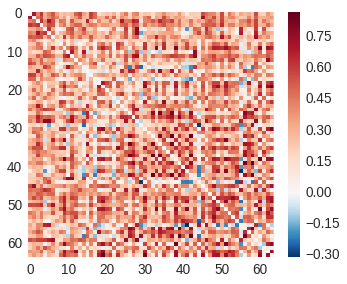

In [64]:

visu.mat(ts.vec2mat(data.iloc[0,:].values))
plt.grid(False)

In [4]:
demograph = pd.read_csv('/media/cdansereau/database1/data/schizo/schizo_6_new_studies_20170516_matched.csv', index_col=0)

demograph = demograph.sort_index()
demograph.index = demograph.index.map(str.strip)
demograph.columns = demograph.columns.map(str.strip)

In [10]:
data.loc[demograph.index.values]

0         1         2         3         4         5  \
A00036107  0.576957  0.362333  0.742555  0.410920  0.520197  0.319091   
A00036128  0.473042  0.626378  0.774311  0.397288  0.703781  0.662797   
A00036129  0.396418  0.223477  0.648720  0.302859  0.220206  0.273149   
A00036131  0.482497 -0.257703 -0.095718 -0.069989  0.355676  0.112282   
A00036133  0.532453  0.186424  0.451866  0.293485  0.157864  0.258996   
A00036135  0.748504  0.330294  0.814656  0.757621  0.774938  0.743191   
A00036136  0.541204  0.410547  0.540798  0.463861  0.464810  0.599121   
A00036138  0.555505  0.463320  0.373185  0.349154  0.616960  0.524205   
A00036157  0.608604  0.433325  0.811827  0.721670  0.603619  0.803609   
A00036162  0.170258  0.766785  0.911720  0.865058  0.903394  0.923947   
A00036169  0.533533  0.366665  0.652404  0.308461  0.202067  0.400192   
A00036170  0.644313  0.532320  0.810209  0.256673  0.443400  0.672758   
A00036171  0.673430  0.191545  0.475469  0.243957  0.591032  0.208610   
A00036182  0.777137  0.791451  0.865747  0.531811  0.799903  0.187612   
A00036185  0.608990  0.586791  0.645236  0.315068  0.577490  0.451316   
A00036188  0.578342  0.525716  0.720686  0.341052  0.581475  0.618273   
A00036190  0.873902  0.901113  0.912162  0.545229  0.790243  0.902734   
A00036192  0.621273  0.489613  0.690943  0.454779  0.528413  0.586148   
A00036195  0.592650  0.150643  0.500670  0.379134  0.166515  0.517148   
A00036197  0.579892  0.503509  0.591305  0.303022  0.508868  0.658116   
A00036199  0.705264  0.427200  0.617624  0.307837  0.432725  0.539355   
A00036201  0.285696  0.411133  0.499249  0.392689  0.438427  0.369482   
A00036203  0.581440  0.493267  0.732009  0.447501  0.440959  0.557894   
A00036204  0.643475  0.050033  0.665611  0.344432  0.415822  0.162746   
A00036205  0.475603  0.340937  0.682483  0.463251  0.505516  0.282260   
A00036212  0.275367 -0.215942 -0.244449 -0.418835 -0.370604  0.356251   
A00036213  0.676083  0.235297  0.922683  0.232097  0.086976 -0.320680   
A00036214  0.599858  0.316372  0.461537  0.403123  0.389906  0.313867   
A00036216  0.492955  0.572949  0.654457  0.252647  0.661821  0.490874   
A00036228  0.693346  0.368549  0.673024  0.162257  0.419059  0.300050   
...             ...       ...       ...       ...       ...       ...   
sz0040032  0.461388  0.497153  0.584222  0.338108  0.472792  0.553806   
sz0040034  0.212349  0.045882  0.685942  0.493294  0.175480  0.549140   
sz0040037  0.080262  0.318447  0.712005  0.249708  0.436554  0.719563   
sz0040046  0.518559  0.388801  0.497014  0.120215  0.397259  0.483943   
sz0040047  0.692798  0.279615  0.640676  0.481285  0.282459  0.570358   
sz0040059  0.688201  0.482994  0.519186  0.403056  0.483284  0.568220   
sz0040064  0.777790  0.343522  0.629852  0.399292  0.502618  0.611471   
sz0040072  0.604477  0.237784  0.555467  0.264822  0.504875  0.758480   
sz0040077  0.547479  0.579735  0.660451  0.234833  0.314816  0.657541   
sz0040078  0.489954  0.684824  0.734656  0.055601  0.587593  0.192903   
sz0040079  0.835572  0.434735  0.847247  0.254467  0.414596  0.812853   
sz0040080  0.533503  0.347854  0.723634  0.305883  0.222252  0.391279   
sz0040081  0.521901  0.388007  0.271407  0.410154  0.443537  0.296032   
sz0040085  0.959951 -0.525494  0.870469  0.700158  0.806377 -0.559802   
sz0040092  0.774316  0.585201  0.618297  0.547857  0.621416  0.198293   
sz0040098  0.493838  0.288906  0.648335 -0.002487  0.259371  0.300584   
sz0040099  0.766613  0.798753  0.922926 -0.573921  0.863425  0.936680   
sz0040103  0.469986  0.430115  0.668191 -0.116846  0.625776  0.590439   
sz0040106  0.094191  0.322718  0.463838  0.231919  0.046922  0.405569   
sz0040108  0.886433  0.615310  0.868896  0.759224  0.844362  0.827355   
sz0040109  0.473653  0.190094  0.571345  0.027009  0.063322  0.137374   
sz0040112 -0.331790 -0.263594  0.561675  0.075575 -0.260697 -0.217330   
sz0040117  0.700385  0.420764  0.825803  0.291038  0.600825  0.724655   
sz0

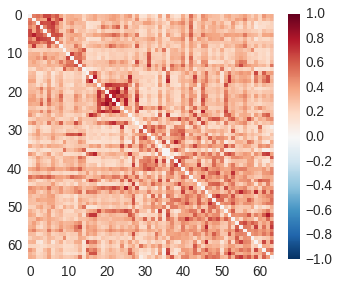

In [65]:
grand_avg = np.mean(data.loc[demograph.index.values].values,0)
visu.mat(ts.vec2mat(grand_avg)[sorted_idx,:][:,sorted_idx],lim=[-1,1])
plt.grid(False)

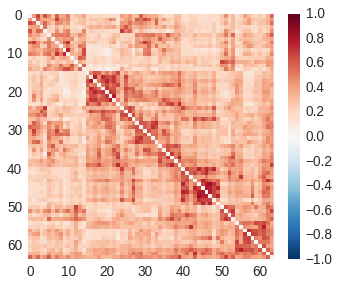

In [44]:
# order using hierarchical clustering
grand_avg = np.mean(data.loc[demograph.index.values].values,0)
aa = ts.vec2mat(grand_avg)[sorted_idx,:][:,sorted_idx]
ind = hc.hclustering(aa,aa.shape[0])
sorted_idx = np.array(hc.order(ind))
aa = aa[sorted_idx,:][:,sorted_idx]

visu.mat(aa,lim=[-1,1])
plt.grid(False)

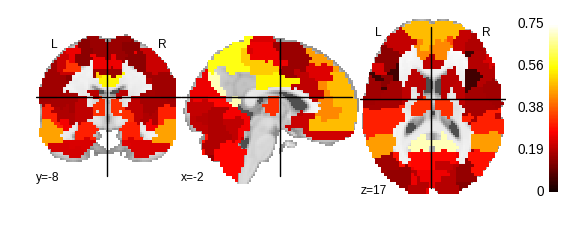

In [66]:
reload(ts)
grand_avg = np.mean(data.loc[demograph.index.values].values,0)
zz = ts.vec2vol(ts.vec2mat(grand_avg)[18,:], im_ref_64)
#plt.imshow(aa[:,:,25])
plotting.plot_stat_map(nib.Nifti2Image(zz,im_ref_all.affine), colorbar=True,vmax=0.75,cut_coords=[-2,-8,17])

In [142]:
import math
def vec2mat(vec, order='python'):
    if order=='matlab':
        N = int(round((1 + math.sqrt(1 + 8 * len(vec))) / 2))

        a = np.ones((N,N))
        mask_ = np.triu(a, 1).astype(bool)
        a[mask_]=vec
        a.T[mask_]=vec
        
    return a
vec = np.array([2,3,4,5,8,9,10,14,15,20])
vec2mat(vec, order='matlab')

array([[  1.,   2.,   3.,   4.,   5.],
       [  2.,   1.,   8.,   9.,  10.],
       [  3.,   8.,   1.,  14.,  15.],
       [  4.,   9.,  14.,   1.,  20.],
       [  5.,  10.,  15.,  20.,   1.]])

In [139]:

def vec2mat(vec, val_diag=0., include_diag=False, style='matlab'):
    
    if include_diag:
        N = int(round((-1 + math.sqrt(1 + 8 * len(vec))) / 2))
        mask_u = np.ones((N, N))
        mask_u = np.tril(mask_u, 0).astype(bool)
        b = np.ones((N, N))
    else:
        N = int(round((1 + math.sqrt(1 + 8 * len(vec))) / 2))
        mask_u = np.ones((N, N))
        mask_u = np.tril(mask_u, -1).astype(bool)
        b = np.ones((N, N)) * val_diag

    mask_nodiag = np.triu(np.ones((N, N)), 1).astype(bool)

    if style == 'matlab':
        # need to re index the values to the C order instead of F
        a = np.ones((N, N)).astype(int)
        a[np.tril(a, -1).astype(bool)] = np.arange(0, len(vec)).astype(int)
        new_vec = vec[a.T[mask_u]]
        b[mask_u] = new_vec
    else:
        b[mask_u] = vec

    # map to the lower triangle
    b.T[mask_nodiag] = b[mask_nodiag]
    return b
    
gg=vec2mat(np.arange(101,111),include_diag=False,style='matlab')
gg

array([[ 0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.]])

In [ ]:
import math
def vec2mat(vec, val_diag=0., include_diag=False, style='matlab'):
    
    if include_diag:
        N = int(round((-1 + math.sqrt(1 + 8 * len(vec))) / 2))
        mask_u = np.ones((N, N))
        mask_u = np.tril(mask_u, 0).astype(bool)
        b = np.ones((N, N))
    else:
        N = int(round((1 + math.sqrt(1 + 8 * len(vec))) / 2))
        mask_u = np.ones((N, N))
        mask_u = np.tril(mask_u, -1).astype(bool)
        b = np.ones((N, N)) * val_diag

    mask_nodiag = np.triu(np.ones((N, N)), 1).astype(bool)

    if style == 'matlab':
        # need to re index the values to the C order instead of F
        a = np.ones((N, N)).astype(int)
        a[np.tril(a, -1).astype(bool)] = np.arange(0, len(vec)).astype(int)
        new_vec = vec[a.T[mask_u]]
        b[mask_u] = new_vec
    else:
        b[mask_u] = vec

    # map to the lower triangle
    b.T[mask_nodiag] = b[mask_nodiag]
    return b
    
gg=vec2mat(np.arange(101,111),include_diag=False,style='matlab')
gg

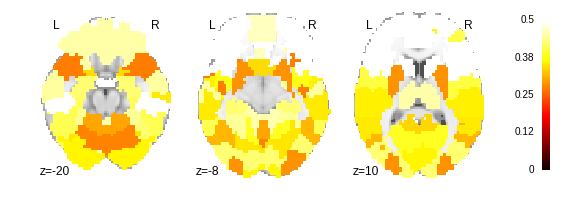

In [442]:
reload(ts)
aa = ts.vec2vol(vec2mat(grand_avg, order='matlab')[18,:], im_ref.get_data())
#plt.imshow(aa[:,:,25])
plotting.plot_stat_map(nib.Nifti1Image(aa,im_ref.affine),display_mode='z',cut_coords=[-20,-8,10], colorbar=True, vmax=0.5)

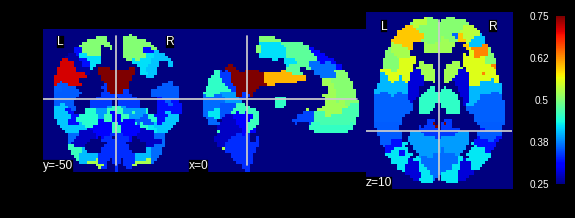

In [444]:
reload(ts)
aa = ts.vec2vol(vec2mat(grand_avg, order='matlab')[18,:], im_ref.get_data())
#plt.imshow(aa[:,:,25])
plotting.plot_epi(nib.Nifti1Image(aa,im_ref.affine), cut_coords=[0,-50,10],colorbar=True, vmin=0.25,vmax=0.75,cmap=plt.cm.jet)

In [50]:
ind_7to64[sorted_idx]

array([5, 3, 4, 5, 4, 4, 4, 6, 7, 5, 6, 5, 1, 1, 2, 5, 7, 7, 4, 4, 5, 6, 6,
       6, 2, 1, 4, 5, 5, 6, 6, 6, 5, 1, 6, 4, 5, 3, 6, 5, 2, 1, 2, 6, 7, 7,
       7, 5, 5, 5, 1, 6, 6, 3, 7, 7, 2, 7, 7, 1, 2, 1, 4, 2])

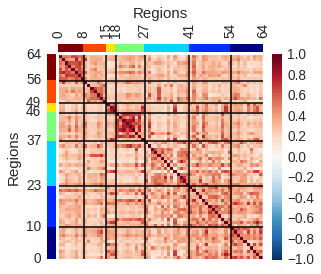

In [67]:
reload(visu)
import matplotlib as mpl

fig = plt.figure(figsize=(4, 4),dpi=150)
sns.set_context('paper',font_scale=1.7)

ind_sub = ind_7to64[sorted_idx].copy()
#visu.mat(hc.ordermat(grand_avg_sort,ind_sub),[-0.2,0.8],True,False)
visu.mat(ts.vec2mat(grand_avg,val_diag=1.)[sorted_idx,:][:,sorted_idx],[-1,1],True,False)

ax = plt.gca()
ax.grid(False)


def show_cluster(ind_sub,lw=1.5,color='w'):
    ax = plt.gca()
    # Use matplotlib directly to emphasize known networks
    networks = np.sort(ind_sub)
    for i, network in enumerate(networks):
        #print i, network
        if i and network != networks[i-1]:
            ax.axhline(i-0.5, c=color, lw=lw)
            ax.axvline(i-0.5, c=color, lw=lw)

show_cluster(ind_sub,color='k')


cmap = plt.cm.jet
ax_bar = fig.add_axes([0.085, 0.16, 0.03, 0.71])
ax_bar_top = fig.add_axes([0.124,0.877 , 0.71,0.03])
#bounds = np.linspace(0, 100, 7)
bounds=[0]
for i in range(7,0,-1):
        bounds.append(bounds[-1] + np.sum(ind_sub==i))

norm = mpl.colors.BoundaryNorm(bounds,cmap.N)


#mpl.colorbar.ColorbarBase(ax_bar, cmap=cmap, norm=norm, spacing=np.sort(ind_sub), ticks=bounds ,boundaries=bounds,orientation='vertical')
cmm = mpl.colorbar.ColorbarBase(ax_bar, cmap=cmap, norm=norm, spacing=bounds ,orientation='vertical')
#ax_bar.get_yaxis().set_ticks([])
#ax_bar.grid(False)
ax_bar.set_ylabel('Regions')
ax_bar.yaxis.tick_left()
ax_bar.yaxis.set_label_position('left')


cmap = plt.cm.jet_r
bounds=[0]
for i in range(1,8,1):
        bounds.append(bounds[-1] + np.sum(ind_sub==i))

norm = mpl.colors.BoundaryNorm(bounds,cmap.N)

cmm = mpl.colorbar.ColorbarBase(ax_bar_top, cmap=cmap, norm=norm, spacing=bounds ,orientation='horizontal')
#ax_bar_top.get_xaxis().set_ticks([])
#ax_bar_top.grid(False)
ax_bar_top.set_xlabel('Regions')
ax_bar_top.xaxis.tick_top()
ax_bar_top.xaxis.set_label_position('top')
ll = ax_bar_top.get_xticklabels()
for label in ll:
    label.set_rotation(90)

main_path = '/home/cdansereau/git/schizo_multisite/'
plt.savefig(main_path + 'figures/matrix_7net_multisite.pdf')
plt.savefig(main_path + 'figures/matrix_7net_multisite.png', dpi = 300, bbox_inches='tight')

In [535]:
idx_cmap = np.linspace(0, 256, 64).astype(int)
cmaplist = [plt.cm.jet(idx_cmap[np.where(ind_sub==i)[0][0]]) for i in np.arange(1,8)]

In [69]:
# define the colormap
cmap = plt.cm.jet_r
# extract all colors from the .jet map
cmaplist = [cmap(i) for i in range(256)]

# create the new map
#cmap = cmap.from_list('Custom cmap', cmaplist, cmap.N)

bounds_sub = np.linspace(0, 64, 8)
bounds_sub = np.ceil(bounds_sub)

for i in range(1,len(bounds)):
    idx_t1 = int(np.round(256*(bounds_sub[i-1]/64.)))
    idx_t2 = int(np.round(256*(bounds_sub[i]/64.)))
    print cmap(idx_t1), idx_t1,idx_t2
    for j in range(idx_t1,idx_t2):
        
        if i==7:
            cmaplist[j]=cmap(idx_t2)
        elif i==6:
            cmaplist[j]=cmap(idx_t2)
        elif i==5:
            cmaplist[j]=cmap(idx_t2-15)
        elif i==4:
            cmaplist[j]=cmap(idx_t1+20)
        elif i==1:
            cmaplist[j]=cmap(idx_t1)
        else:
            cmaplist[j]=cmap(idx_t1)
            
# force the first color entry to be grey
cmaplist[0] = (.5,.5,.5,1.0)   
cmap = cmap.from_list('Custom cmap', cmaplist, cmap.N)



(0.5, 0.0, 0.0, 1.0) 0 40
(1.0, 0.24763979665940458, 0.0, 1.0) 40 76
(1.0, 0.77051561365286858, 0.0, 1.0) 76 112
(0.67994939911448449, 1.0, 0.28779253636938651, 1.0) 112 148
(0.2245414294750161, 1.0, 0.74320050600885501, 1.0) 148 184
(0.0, 0.61372549019607847, 1.0, 1.0) 184 220
(0.0, 0.049019607843137303, 1.0, 1.0) 220 256


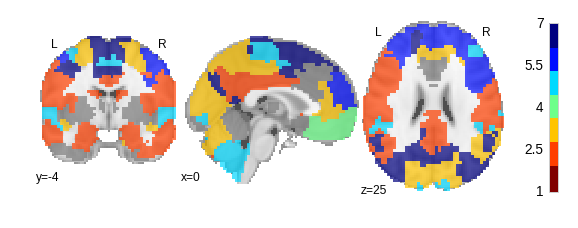

In [659]:
nn_map = ts.vec2vol(ind_sub,im_ref.get_data())
im_over = nib.Nifti1Image(nn_map, im_ref.get_affine())


plotting.plot_roi(im_over,
                  cut_coords=(0, -4, 25), colorbar=True, cmap=cmap, draw_cross=False)

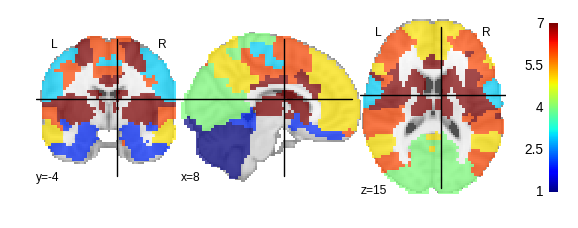

In [640]:

plotting.plot_roi(im_over,
                  cut_coords=(8, -4, 15), colorbar=True, cmap=plt.cm.jet)

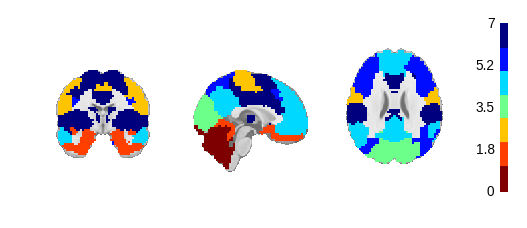

In [70]:
import nibabel as nib
from nilearn import plotting
#im_ref = nib.Nifti1Image(im_ref.get_data(), im_ref.get_affine())

anat_template = nib.load('/home/cdansereau/Dropbox/McGill-publication/papers/white_template.nii.gz')
    
fig = plt.figure(figsize=(15,10))

#data_dmn = 8-#all_sites[hc.order(ind_sub==2),:].mean(axis=0)

#vis.mat(hc.ordermat(rejected ,order),lim_mean_diff,False,False)

nn_map = ts.vec2vol(np.arange(1,8),im_ref_7)
im_over = nib.Nifti1Image(nn_map, im_ref_all.get_affine())
display = plotting.plot_anat(anat_img=anat_template,
                             #display_mode='z',
                             #cut_coords=[-25,-15,0,15,25,45],
                             cut_coords=(0, -5, 25),
                             annotate=False,
                             draw_cross=False,
                             )

display.add_overlay(im_over,
                    colorbar=True,
                    vmin=0,
                    vmax=7,
                    cmap=cmap)



plt.savefig('samples/networks_partition7.png', dpi = 300, bbox_inches='tight')

#im_over.to_filename('/home/cdansereau/git/Projects/multisite/partition_7networks.nii.gz')

In [71]:
import statsmodels.stats.multitest as smm
import statsmodels.api as sm

def test_diff(y, X):
    pval = []
    x_ = sm.add_constant(X)
    
    for nn in range(y.shape[1]):
        model = sm.OLS(y[:,nn], x_)
        res = model.fit()
        #print(res.summary())
        pval.append(res.pvalues[1])
    pval = np.array(pval)
    rejected , pvaluecorrected = smm.multipletests(pval, alpha=0.05, method='fdr_bh')[:2]
    rejected = ts.vec2mat(rejected,0)
    return rejected

In [155]:
import matplotlib.patches as patches
def plot_connectomes(demog_set,flag_diff_only=False, label=''):
    data_ = data.loc[demog_set.index.values].copy()
    if not flag_diff_only:
        plt.figure(figsize=(20,5))
    else:
        plt.figure()
    # HC
    if not flag_diff_only: 
        ax = plt.subplot(1,4,1)
        hc_vec = data_[(demog_set['sz']==0)].values.mean(0)
        hc_mat = hc.ordermat(ts.vec2mat(hc_vec), ind_7to64)
        visu.mat(hc_mat,[-1,1],True,False)
        plt.grid(False)
        show_cluster(ind_sub,color='k')
        p=patches.Rectangle(
            (-0.5, -0.5), 63.95, 63.95, fill=False,
            edgecolor=None,      # Default
            linewidth=3
        )
        ax.add_patch(p)
    
    # SZ
    if not flag_diff_only: 
        ax=plt.subplot(1,4,2)
        sz_vec = data_[(demog_set['sz']==1)].values.mean(0)
        sz_mat = hc.ordermat(ts.vec2mat(sz_vec), ind_7to64)
        visu.mat(sz_mat,[-1,1],True,False)
        plt.grid(False)
        show_cluster(ind_sub,color='k')
        p=patches.Rectangle(
                (-0.5, -0.5), 63.5, 63.5, fill=False,
                edgecolor=None,      # Default
                linewidth=3
            )
        ax.add_patch(p)
    # diff
    if not flag_diff_only: 
        ax=plt.subplot(1,4,3)
    else:
        ax = plt.subplot(111)
    diff = data_[(demog_set['sz']==1)].values.mean(0) - data_[(demog_set['sz']==0)].values.mean(0)
    diff_mat = hc.ordermat(ts.vec2mat(diff), ind_7to64)
    visu.mat(diff_mat,[-0.15,0.15],True,False)
    plt.grid(False)
    show_cluster(ind_sub,color='k')
    p=patches.Rectangle(
            (-0.5, -0.5), 63.5, 63.5, fill=False,
            edgecolor=None,      # Default
            linewidth=3
        )
    ax.add_patch(p)
    if flag_diff_only:
        plt.savefig('samples/univar_'+label+'.png', dpi = 300, bbox_inches='tight')
    # diff
    if not flag_diff_only: 
        ax = plt.subplot(1,4,4)
        rejected = test_diff(data_.loc[demog_set.index.values].values, demog_set[['sz']].values)
        diff_mat_reject = hc.ordermat(rejected, ind_7to64)
        #visu.mat(diff_mat*2.,lim=[0,1])
        
        print 'rejected',ts.mat2vec(diff_mat_reject).sum()
        visu.mat(diff_mat_reject,[0,1],True,False,plt.cm.Greys)
        plt.grid(False)
        show_cluster(ind_sub,color='k')
        p=patches.Rectangle(
                (-0.5, -0.5), 63.5, 63.5, fill=False,
                edgecolor=None,      # Default
                linewidth=3
            )
        ax.add_patch(p)

    plt.tight_layout()
    return ts.mat2vec(diff_mat)

rejected 769.0


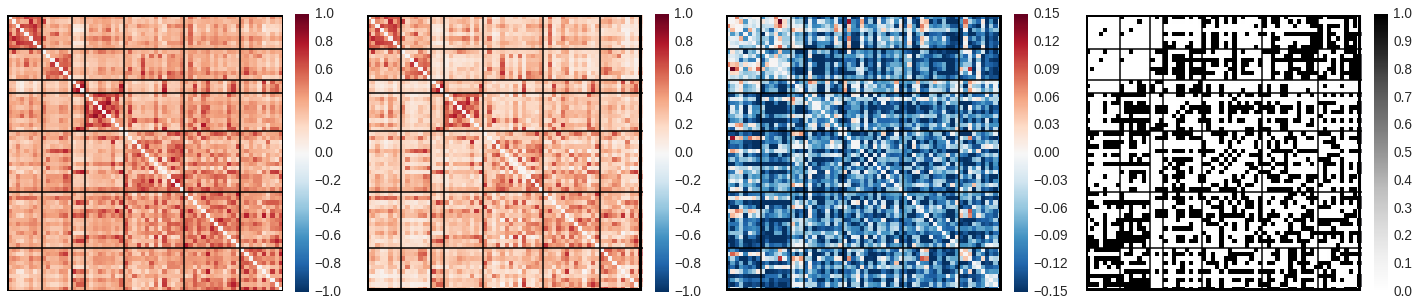

In [73]:
reload(ts)
# 1a over all the data
demog_set = demograph[(demograph['study']==1) | (demograph['study']==2)]
plot_connectomes(demog_set)
plt.savefig('samples/univar_main.png', dpi = 300, bbox_inches='tight')


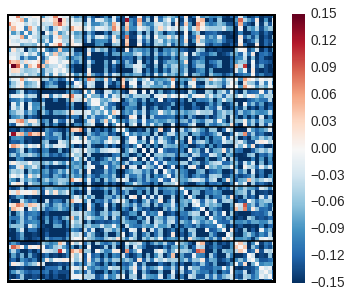

In [74]:
demog_set = demograph[(demograph['study']==1) | (demograph['study']==2)]
plot_connectomes(demog_set,flag_diff_only=True)
plt.savefig('samples/univar_main_diff.png', dpi = 300, bbox_inches='tight')

In [75]:
from itertools import combinations

# compute the site id combinations for training and testing
def get_sites(n_sites=6, comb_set=2, intra=True):
    
    L = np.arange(1,n_sites+1)
    train_combi = np.array([ comb for comb in combinations(L, comb_set)])
    
    
    if intra:
        test_combi = np.copy(train_combi)
    else:
        test_combi = np.array([[x for x in L if x not in train_combi[ii]] for ii in range(train_combi.shape[0])])
    
    return train_combi,test_combi
    
get_sites(n_sites=6,comb_set=4,intra=False)

(array([[1, 2, 3, 4],
        [1, 2, 3, 5],
        [1, 2, 3, 6],
        [1, 2, 4, 5],
        [1, 2, 4, 6],
        [1, 2, 5, 6],
        [1, 3, 4, 5],
        [1, 3, 4, 6],
        [1, 3, 5, 6],
        [1, 4, 5, 6],
        [2, 3, 4, 5],
        [2, 3, 4, 6],
        [2, 3, 5, 6],
        [2, 4, 5, 6],
        [3, 4, 5, 6]]), array([[5, 6],
        [4, 6],
        [4, 5],
        [3, 6],
        [3, 5],
        [3, 4],
        [2, 6],
        [2, 5],
        [2, 4],
        [2, 3],
        [1, 6],
        [1, 5],
        [1, 4],
        [1, 3],
        [1, 2]]))

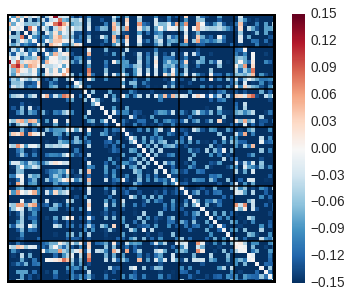

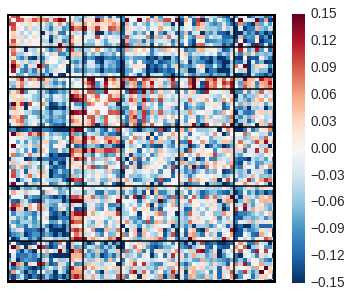

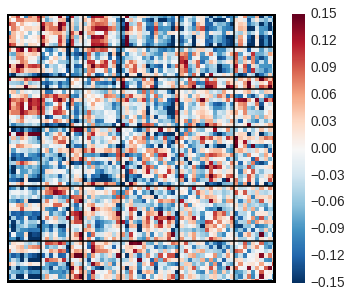

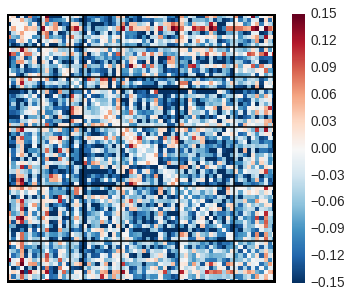

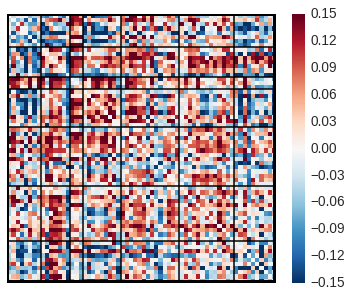

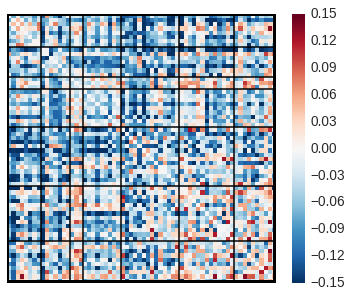

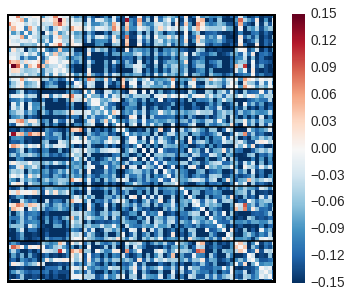

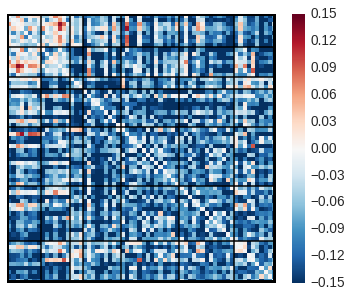

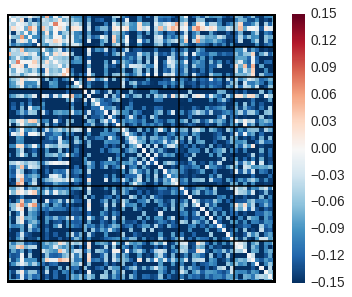

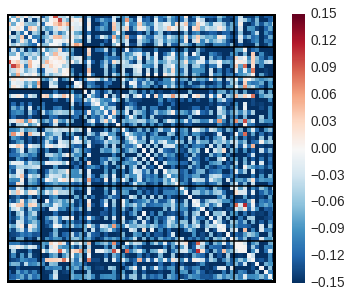

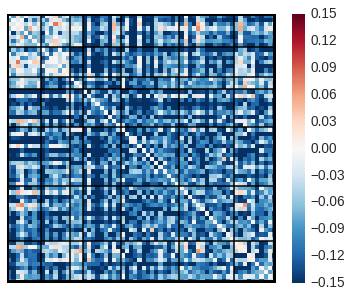

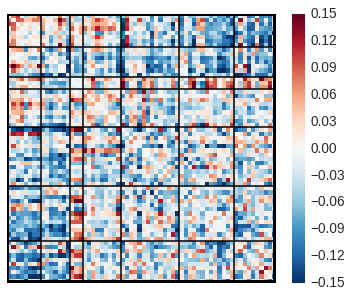

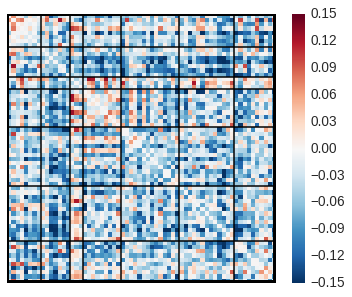

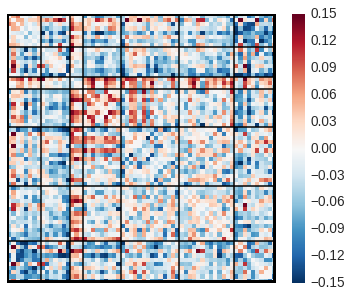

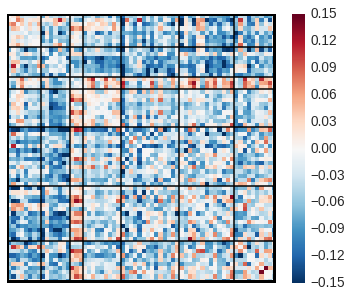

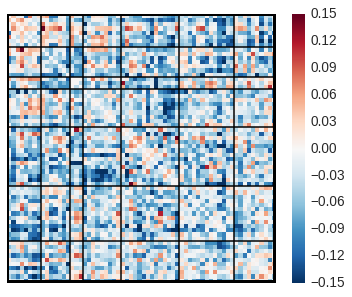

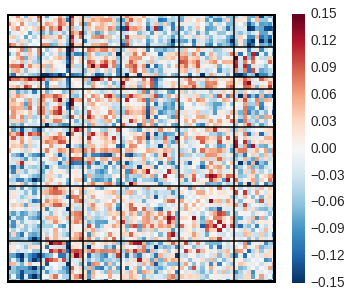

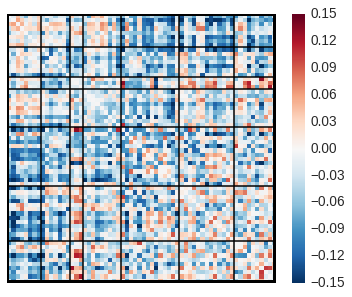

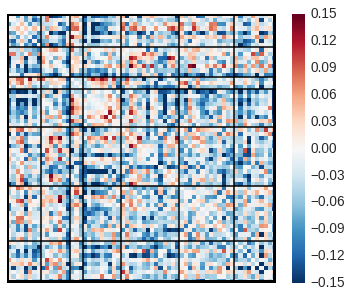

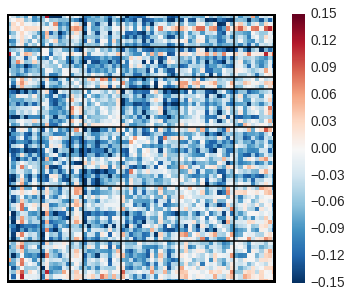

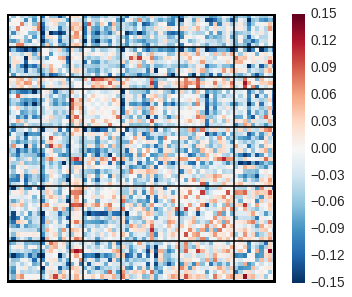

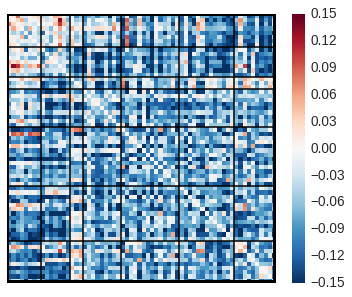

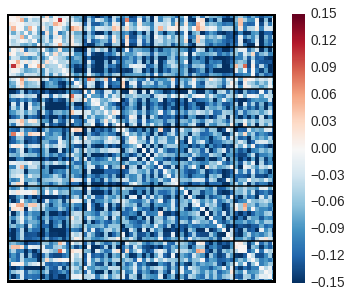

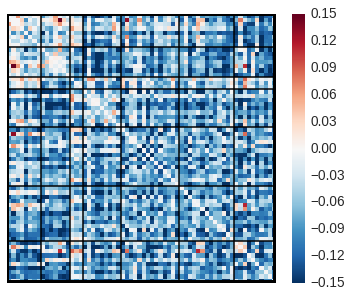

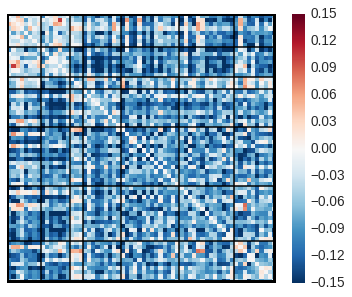

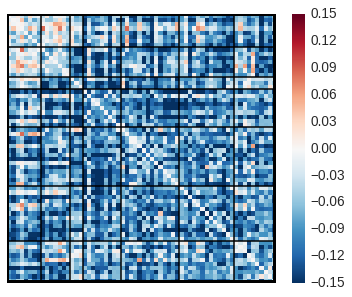

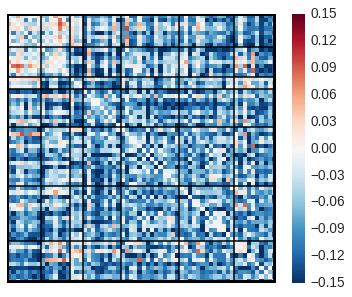

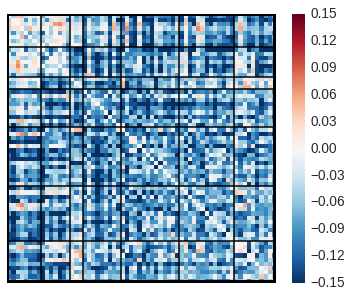

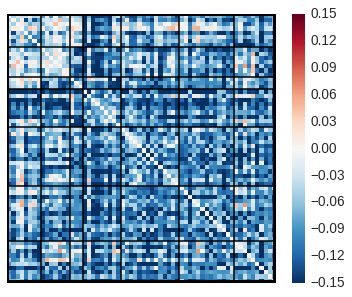

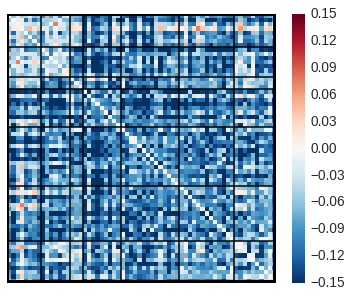

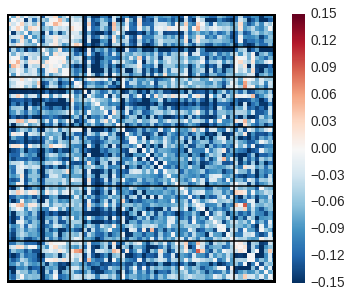

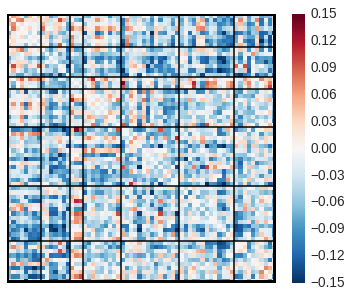

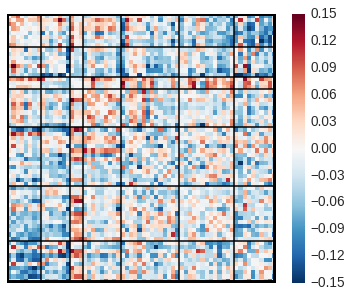

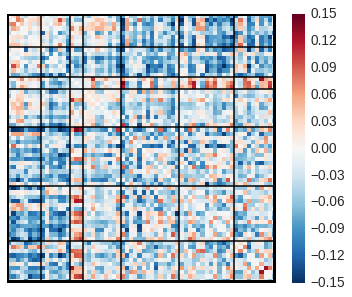

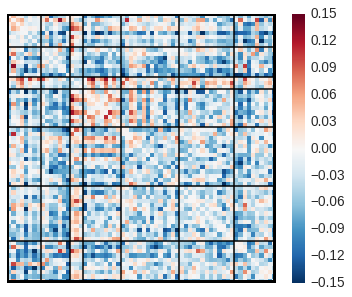

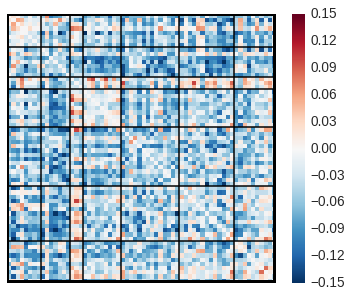

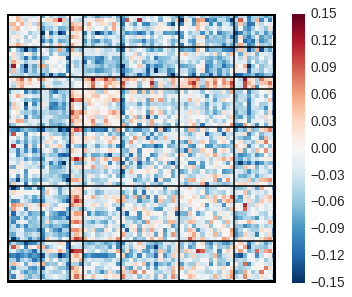

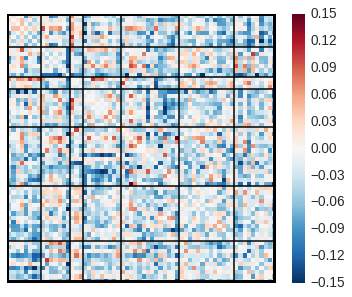

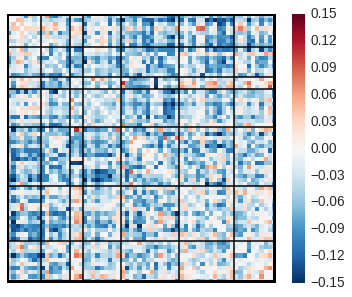

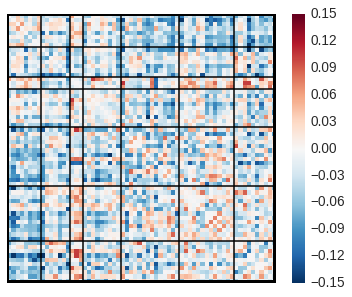

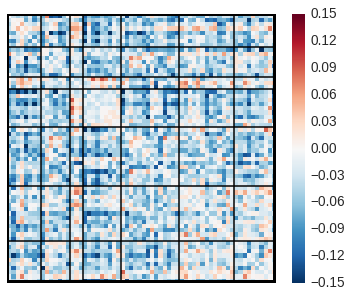

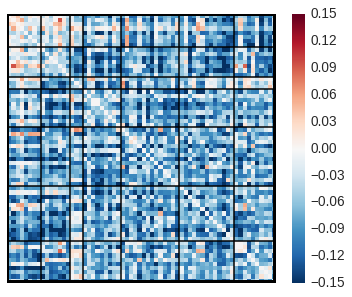

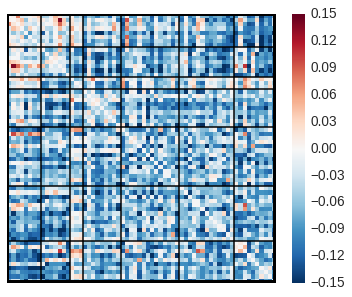

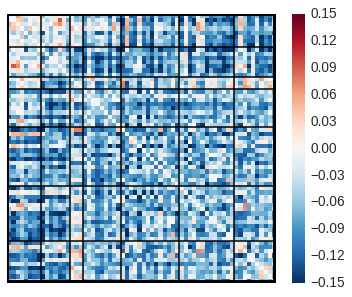

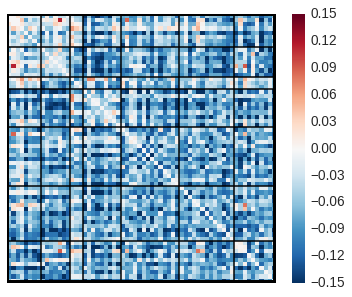

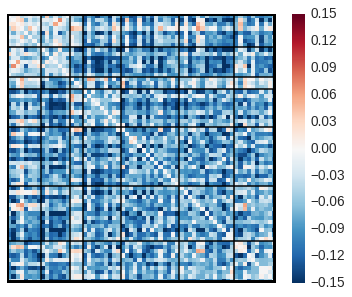

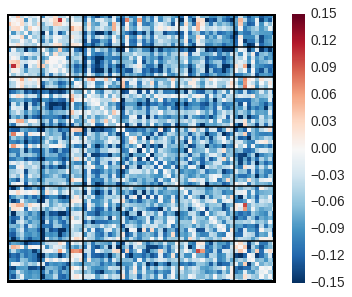

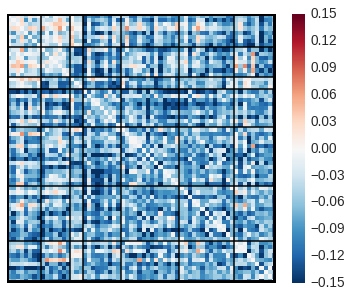

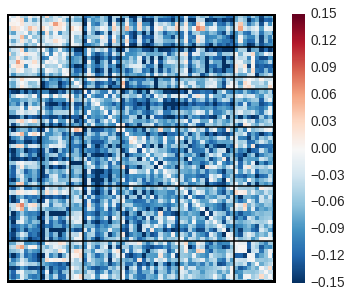

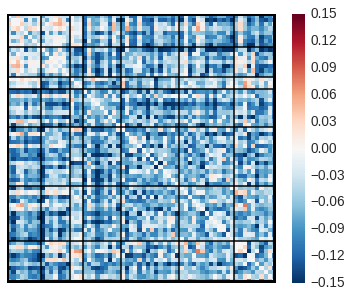

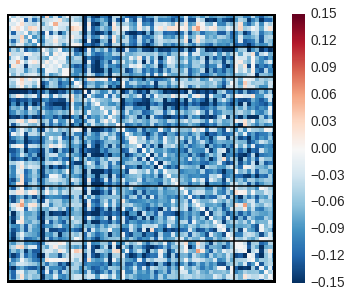

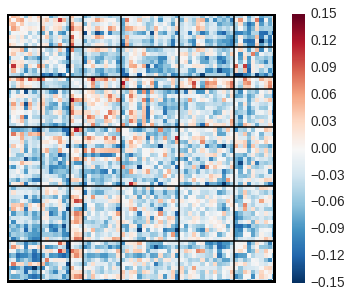

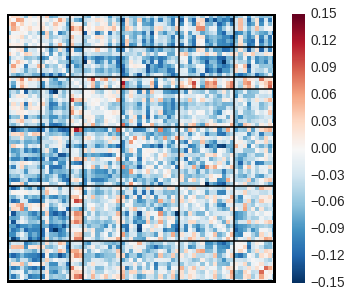

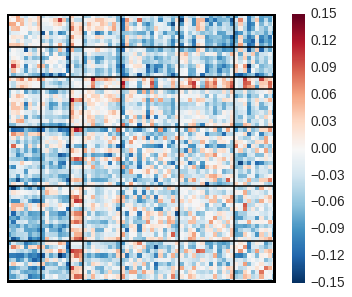

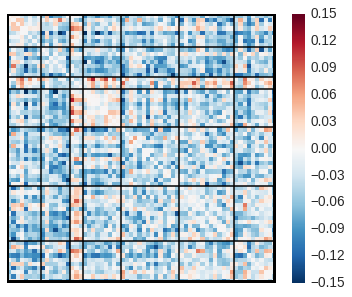

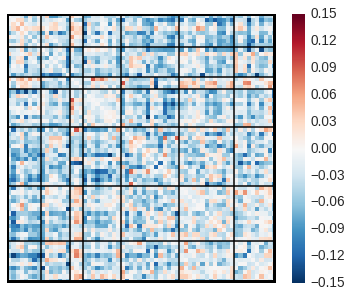

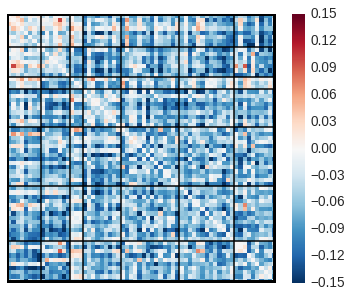

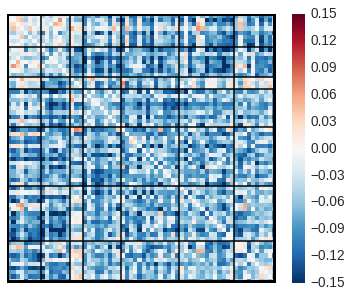

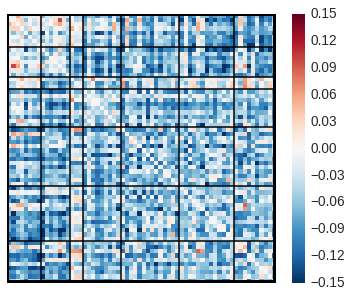

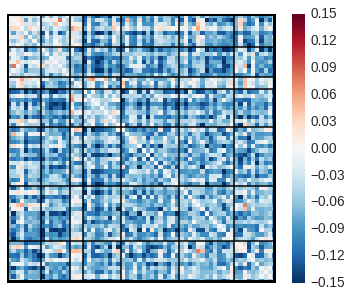

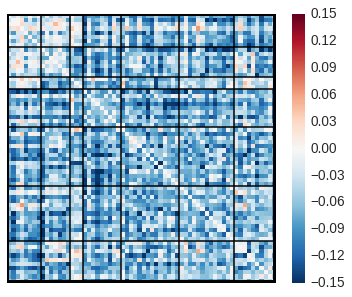

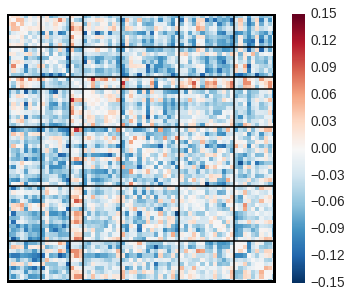

In [161]:
# 1b for each pair
main_correlation_comp = []
for nsites in np.arange(1,6):
    list_site,_ = get_sites(n_sites=6,comb_set=nsites,intra=True)
    for ii in range(list_site.shape[0]):
        mask = np.zeros_like(demograph['study'].values).astype(bool)
        for ss in range(list_site.shape[1]):
            mask = mask | (demograph['study']==list_site[ii,ss]).values
        demog_set = demograph[mask]
        label = ''.join(list_site[ii,:].astype(str))
        main_correlation_comp.append(plot_connectomes(demog_set,flag_diff_only=True,label=label))


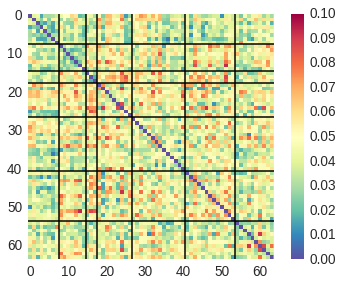

In [110]:

plt.imshow(ts.vec2mat(np.stack(main_correlation_comp).std(0),val_diag=0),interpolation='none', cmap=plt.cm.Spectral_r, vmax=0.1)
plt.colorbar()

plt.grid(False)
show_cluster(ind_sub,color='k')

plt.savefig('samples/univar_std.png', dpi = 300, bbox_inches='tight')


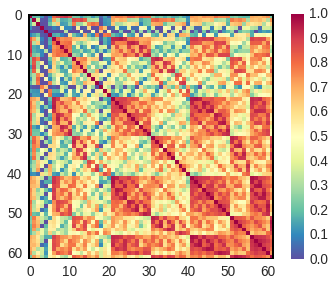

In [162]:
# correlation between diff maps
fig = plt.figure()
ax=plt.subplot(1,1,1)
plt.imshow(np.corrcoef(np.stack(main_correlation_comp)),interpolation='none', cmap=plt.cm.Spectral_r,vmin=0,vmax=1)
plt.grid(False)
plt.colorbar()
p=patches.Rectangle(
        (-0.5, -0.5), 61.95, 61.95, fill=False,
        edgecolor=None,      # Default
        linewidth=3
    )
ax.add_patch(p)
plt.savefig('samples/univar_ari.png', dpi = 300, bbox_inches='tight')
                 
df = pd.DataFrame(np.corrcoef(np.stack(main_correlation_comp)))
df.to_csv('samples/univar_ari.csv')

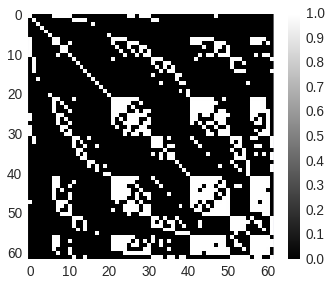

In [114]:
visu.mat(np.corrcoef(np.stack(main_correlation_comp))>0.8)
plt.grid(False)

# MULTIVARIATES

In [147]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC,LinearSVC
parameters = {'C':[0.001, 0.005, 0.01, 0.05]}
def train_model_4coef(select_data):
    y = select_data['sz'].values
    x = data.loc[select_data.index.values].values
    # train
    xtrain,ytrain = shuffle(x,y)
    clf = LinearSVC(class_weight='balanced',C=0.005)
    gs = GridSearchCV(clf, parameters)
    #clf = SVC(kernel='linear', class_weight='balanced', C=.1)
    #clf, score = predlib.grid_search(clf, xtrain,ytrain, n_folds=3, verbose=False)
    gs.fit(xtrain,ytrain)
    coef = gs.best_estimator_.coef_[0,:]
    return (coef-coef.mean())/coef.std()



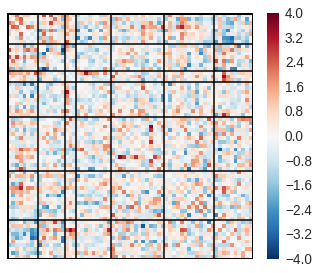

In [122]:
# 2a multivariate analysis all train on all sites

#plt.subplot(1,4,4)
plt.figure()
ax = plt.subplot(111)
coef = train_model_4coef(demograph)
coef_mat = hc.ordermat(ts.vec2mat(coef), ind_7to64)
#visu.mat(diff_mat*2.,lim=[0,1])
visu.mat(coef_mat,[-4,4],True,False,plt.cm.RdBu_r)
plt.grid(False)
show_cluster(ind_sub,color='k')
p=patches.Rectangle(
        (-0.5, -0.5), 63.95, 63.95, fill=False,
        edgecolor=None,      # Default
        linewidth=3
    )
ax.add_patch(p)
plt.savefig('samples/multivar_main_coefs.png', dpi = 300, bbox_inches='tight')

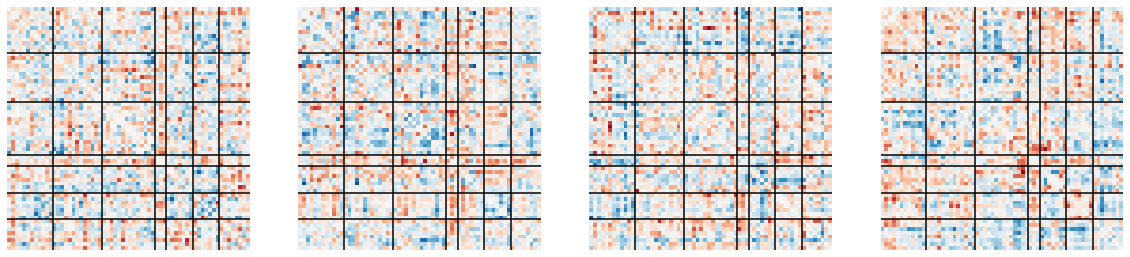

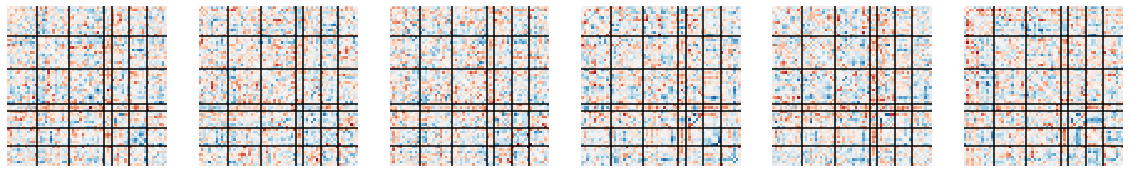

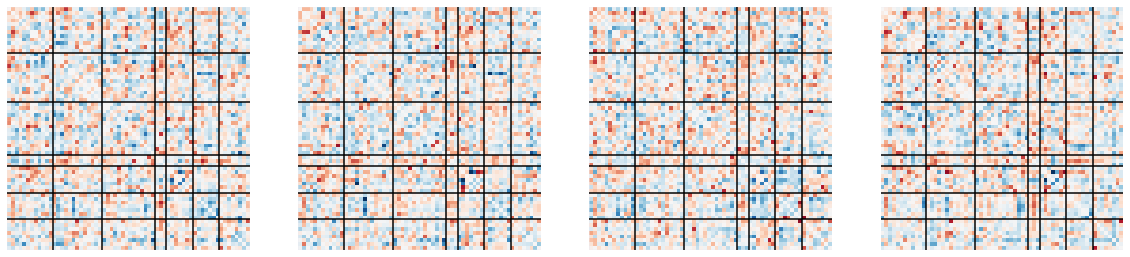

In [617]:
# 2b multivariate analysis train on 13 set of sites
main_correlation_comp_multivar = []
plt.figure(figsize=(20,5))
list_1site = np.array([[1,2,3,4]]).T
for ii in range(list_1site.shape[0]):
    plt.subplot(1,list_1site.shape[0],ii+1)
    coef = train_model_4coef(demograph[(demograph['study']==list_1site[ii,0])])
    main_correlation_comp_multivar.append(coef)
    coef_mat = hc.ordermat(ts.vec2mat(coef), ind_7to64)
    visu.mat(coef_mat,[-4,4],False,False,plt.cm.RdBu_r)
    plt.grid(False)
    show_cluster(ind_sub,color='k')

    
plt.figure(figsize=(20,5))
list_2site = np.array([[1,2],[1,3],[1,4],[2,3],[2,4],[3,4]])
for ii in range(list_2site.shape[0]):
    plt.subplot(1,list_2site.shape[0],ii+1)
    coef = train_model_4coef(demograph[(demograph['study']==list_2site[ii,0]) | (demograph['study']==list_2site[ii,1])])
    main_correlation_comp_multivar.append(coef)
    coef_mat = hc.ordermat(ts.vec2mat(coef), ind_7to64)
    visu.mat(coef_mat,[-4,4],False,False,plt.cm.RdBu_r)
    plt.grid(False)
    show_cluster(ind_sub,color='k')
    
    
plt.figure(figsize=(20,5))
list_3site = np.array([[1,2,3],[1,2,4],[1,3,4],[2,3,4]])
for ii in range(list_3site.shape[0]):
    plt.subplot(1,list_3site.shape[0],ii+1)
    coef = train_model_4coef(demograph[(demograph['study']==list_3site[ii,0]) | (demograph['study']==list_3site[ii,1]) | (demograph['study']==list_3site[ii,2])])
    main_correlation_comp_multivar.append(coef)
    coef_mat = hc.ordermat(ts.vec2mat(coef), ind_7to64)
    visu.mat(coef_mat,[-4,4],False,False,plt.cm.RdBu_r)
    plt.grid(False)
    show_cluster(ind_sub,color='k')

    

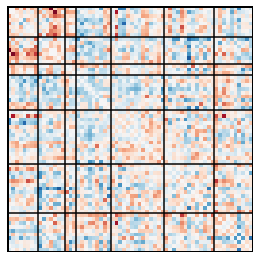

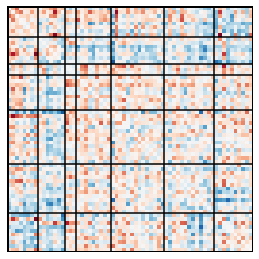

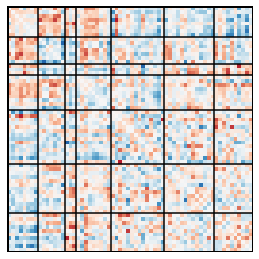

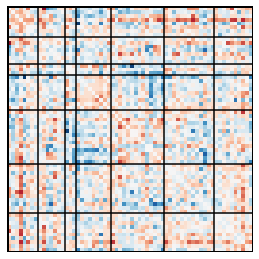

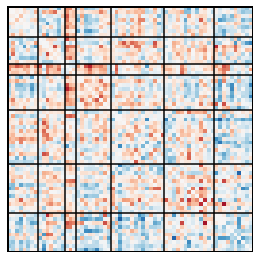

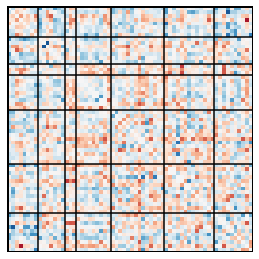

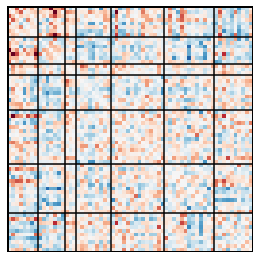

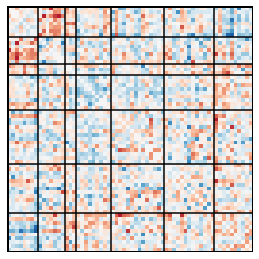

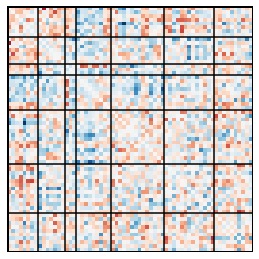

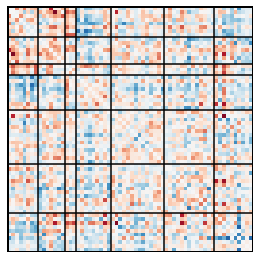

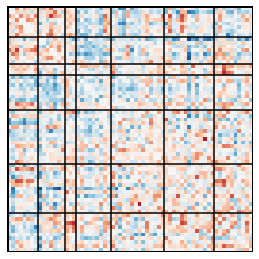

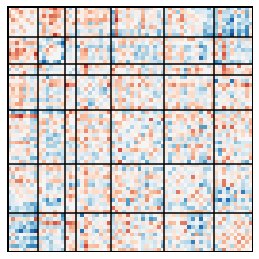

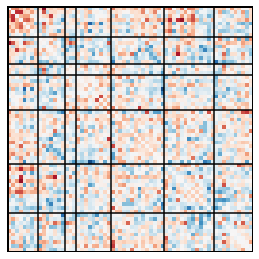

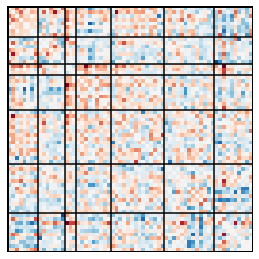

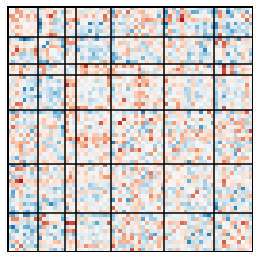

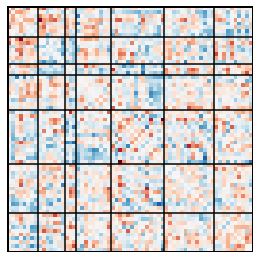

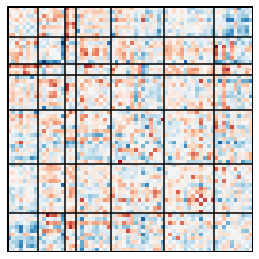

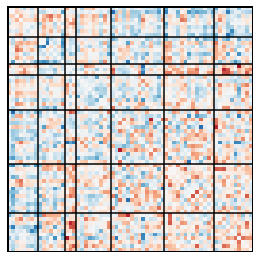

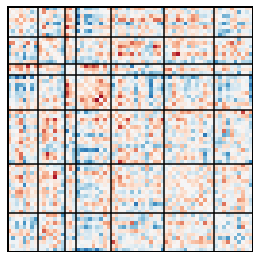

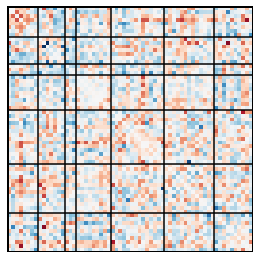

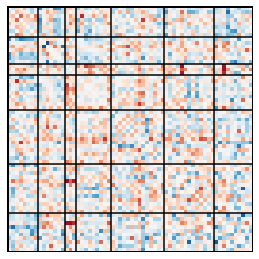

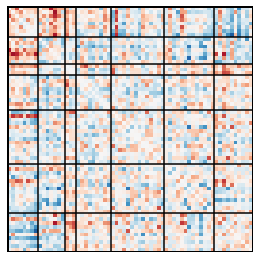

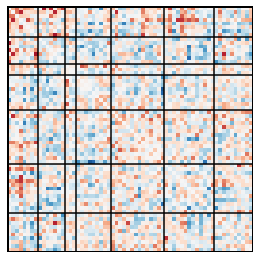

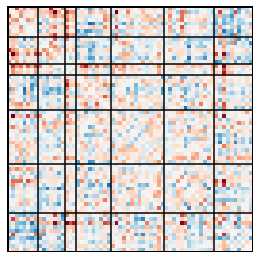

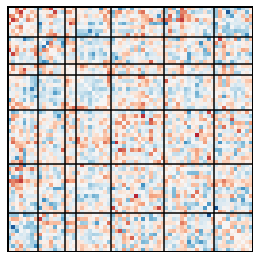

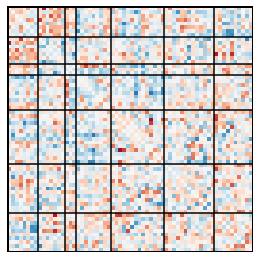

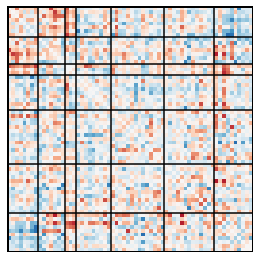

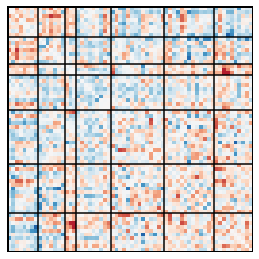

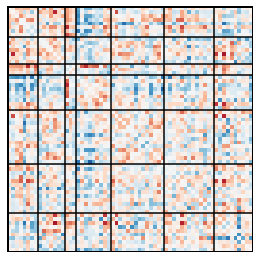

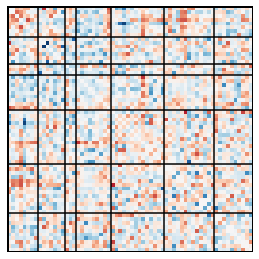

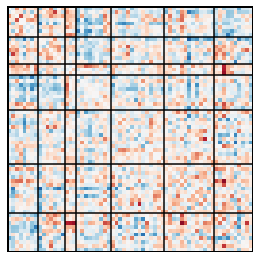

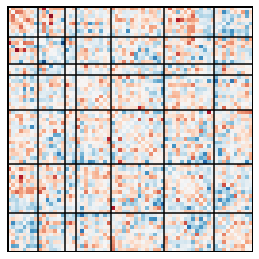

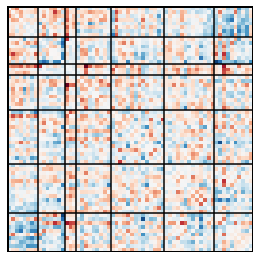

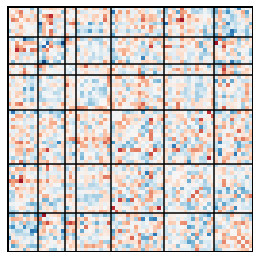

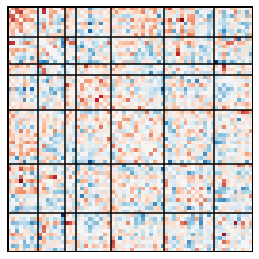

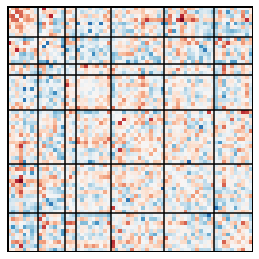

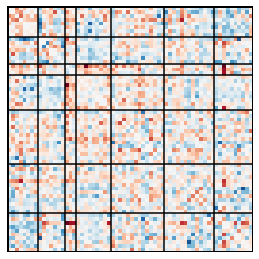

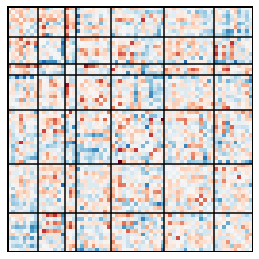

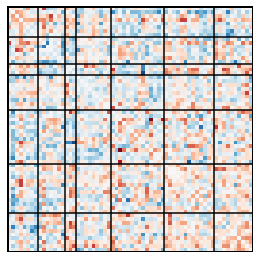

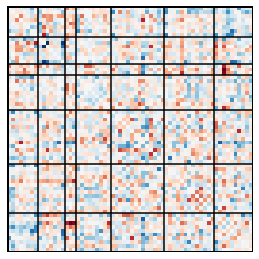

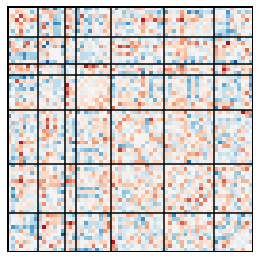

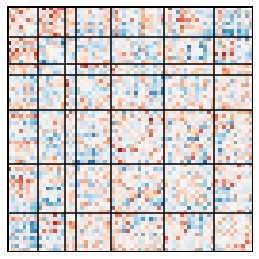

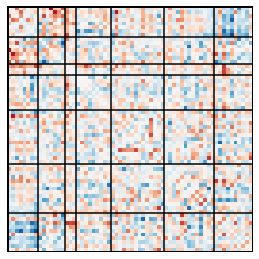

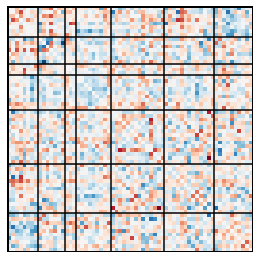

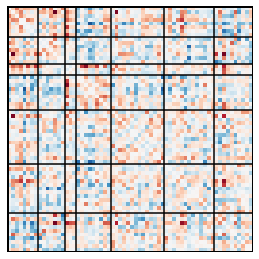

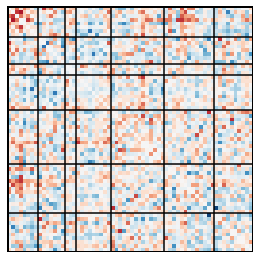

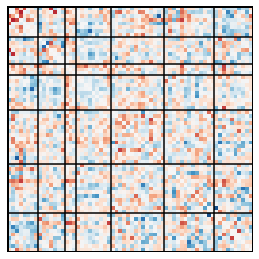

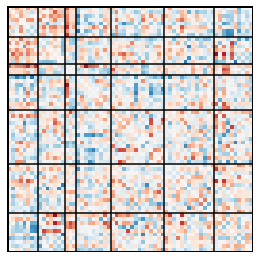

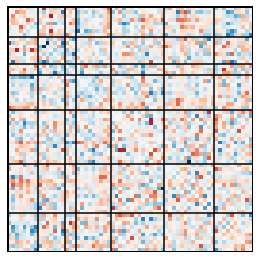

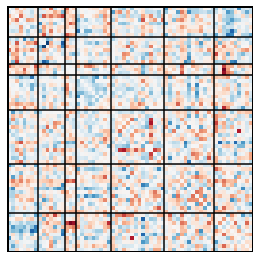

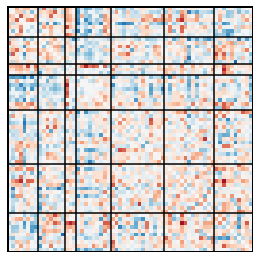

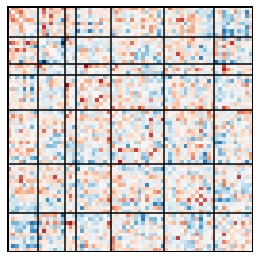

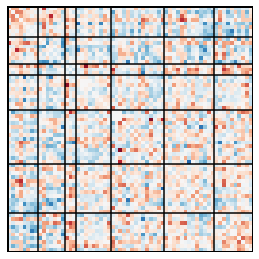

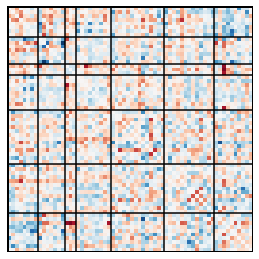

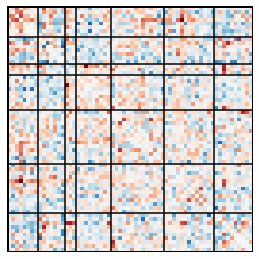

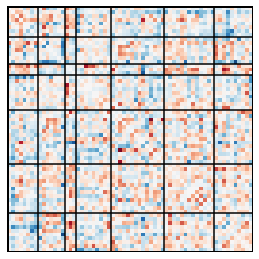

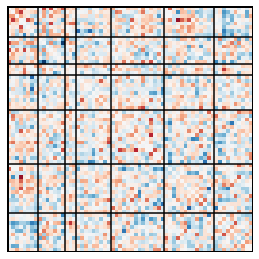

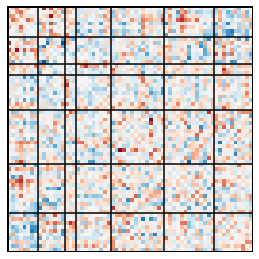

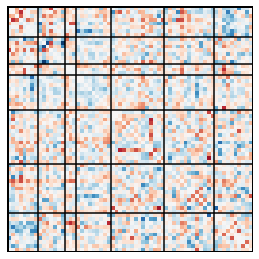

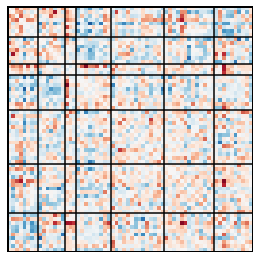

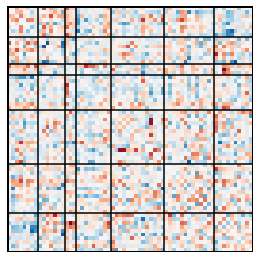

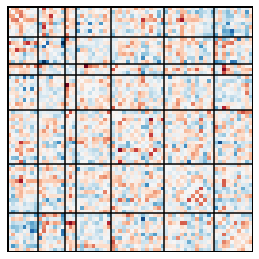

In [125]:
# 2b multivariate analysis train on 13 set of sites
main_correlation_comp_multivar = []
for nsites in np.arange(1,6):
    list_site,_ = get_sites(n_sites=6,comb_set=nsites,intra=True)
    for ii in range(list_site.shape[0]):
        mask = np.zeros_like(demograph['study'].values).astype(bool)
        for ss in range(list_site.shape[1]):
            mask = mask | (demograph['study']==list_site[ii,ss]).values
        plt.figure()
        ax=plt.subplot(111)
        coef = train_model_4coef(demograph[mask])
        main_correlation_comp_multivar.append(coef)
        coef_mat = hc.ordermat(ts.vec2mat(coef), ind_7to64)
        visu.mat(coef_mat,[-4,4],False,False,plt.cm.RdBu_r)
        plt.grid(False)
        show_cluster(ind_sub,color='k')
        p=patches.Rectangle(
            (-0.5, -0.5), 63.95, 63.95, fill=False,
            edgecolor=None,      # Default
            linewidth=3
        )
        ax.add_patch(p)
        plt.savefig('samples/multivar_'+''.join(list_site[ii,:].astype(str))+'.png', dpi = 300, bbox_inches='tight')


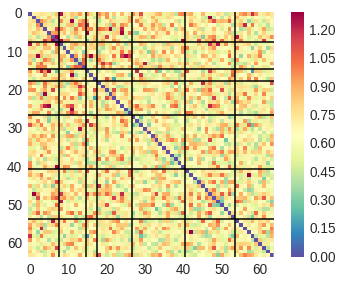

In [130]:

plt.imshow(ts.vec2mat(np.stack(main_correlation_comp_multivar).std(0),val_diag=0),interpolation='none', cmap=plt.cm.Spectral_r,vmax=1.3)
plt.colorbar()

plt.grid(False)
show_cluster(ind_sub,color='k')

plt.savefig('samples/multivar_std.png', dpi = 300, bbox_inches='tight')
plt.savefig('samples/multivar_std.pdf', dpi = 300, bbox_inches='tight')

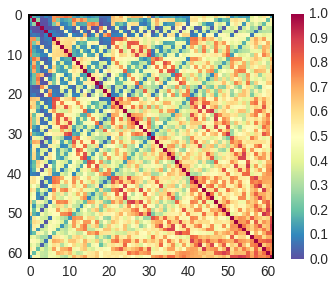

In [157]:
import matplotlib.patches as patches
# correlation matrix of all the coeff connectomes
fig = plt.figure(linewidth=2)
ax=plt.subplot(1,1,1)
plt.imshow(np.corrcoef(np.stack(main_correlation_comp_multivar)),interpolation='none',cmap=plt.cm.Spectral_r,vmin=0,vmax=1)
plt.grid(False)
plt.colorbar()
#ax = plt.Axes(fig, [0., 0., 1., 1.])
#ax.set_axis_off()
#fig.add_axes(ax)
p=patches.Rectangle(
        (-0.5, -0.5), 61.95, 61.95, fill=False,
        edgecolor=None,      # Default
        linewidth=3
    )
ax.add_patch(p)
plt.savefig('samples/multivar_ari.png', dpi = 300, bbox_inches='tight')

df = pd.DataFrame(np.corrcoef(np.stack(main_correlation_comp_multivar)))
df.to_csv('samples/multivar_ari.csv')

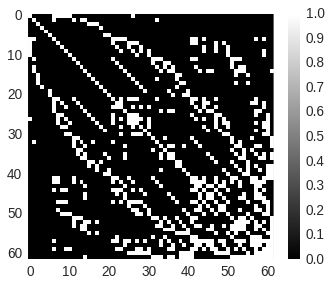

In [132]:
visu.mat(np.corrcoef(np.stack(main_correlation_comp_multivar))>0.7)
plt.grid(False)

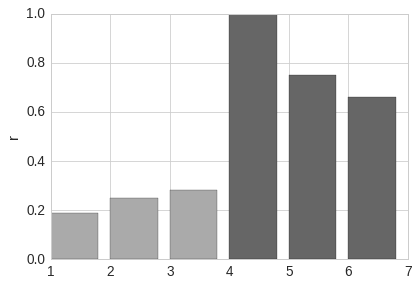

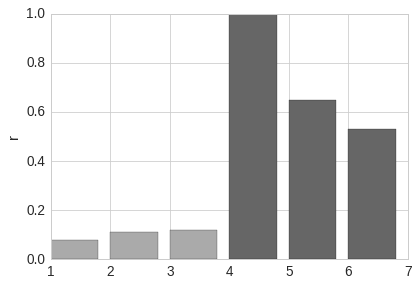

In [652]:
sns.set_style("whitegrid")
set_univar  = [0.19,0.25,0.28,1,0.75,0.66]
set_multivar= [0.08,0.11,0.12,1,0.65,0.53]
plt.figure()
colors = ['#aaaaaa', '#aaaaaa', '#aaaaaa', '#666666', '#666666' , '#666666']

plt.bar([1,2,3,4,5,6],set_univar,color=colors)
plt.ylabel('r')

plt.savefig('samples/cor_bar_univar.png', dpi = 300, bbox_inches='tight')

plt.figure()
plt.bar([1,2,3,4,5,6],set_multivar,color=colors)
plt.ylabel('r')

plt.savefig('samples/cor_bar_multivar.png', dpi = 300, bbox_inches='tight')

In [214]:
def search_ids(sites_number, overlap):
    
    sequence = []
    for jj in np.arange(1,7):
        n_ = 1
        seq_ = []
        for nsites in np.arange(1,6):
            list_site,_ = get_sites(n_sites=6,comb_set=nsites,intra=True)
            for ii in range(list_site.shape[0]):
                print n_,list_site[ii]
                

                if nsites == sites_number:
                    
                    if overlap:
                        if np.any(list_site[ii] == jj):
                            print 'match'
                            seq_.append(n_-1)
                    else:
                        if not np.any(list_site[ii] == jj):
                            print 'match'
                            seq_.append(n_-1)
                            
                n_+=1
                        
        sequence.append(np.array(seq_))
    return np.array(sequence)
            #if not np.any(list_site[ii] == 1):
            #    print 'ok'
xyz = search_ids(1, overlap = False)

1 [1]
2 [2]
match
3 [3]
match
4 [4]
match
5 [5]
match
6 [6]
match
7 [1 2]
8 [1 3]
9 [1 4]
10 [1 5]
11 [1 6]
12 [2 3]
13 [2 4]
14 [2 5]
15 [2 6]
16 [3 4]
17 [3 5]
18 [3 6]
19 [4 5]
20 [4 6]
21 [5 6]
22 [1 2 3]
23 [1 2 4]
24 [1 2 5]
25 [1 2 6]
26 [1 3 4]
27 [1 3 5]
28 [1 3 6]
29 [1 4 5]
30 [1 4 6]
31 [1 5 6]
32 [2 3 4]
33 [2 3 5]
34 [2 3 6]
35 [2 4 5]
36 [2 4 6]
37 [2 5 6]
38 [3 4 5]
39 [3 4 6]
40 [3 5 6]
41 [4 5 6]
42 [1 2 3 4]
43 [1 2 3 5]
44 [1 2 3 6]
45 [1 2 4 5]
46 [1 2 4 6]
47 [1 2 5 6]
48 [1 3 4 5]
49 [1 3 4 6]
50 [1 3 5 6]
51 [1 4 5 6]
52 [2 3 4 5]
53 [2 3 4 6]
54 [2 3 5 6]
55 [2 4 5 6]
56 [3 4 5 6]
57 [1 2 3 4 5]
58 [1 2 3 4 6]
59 [1 2 3 5 6]
60 [1 2 4 5 6]
61 [1 3 4 5 6]
62 [2 3 4 5 6]
1 [1]
match
2 [2]
3 [3]
match
4 [4]
match
5 [5]
match
6 [6]
match
7 [1 2]
8 [1 3]
9 [1 4]
10 [1 5]
11 [1 6]
12 [2 3]
13 [2 4]
14 [2 5]
15 [2 6]
16 [3 4]
17 [3 5]
18 [3 6]
19 [4 5]
20 [4 6]
21 [5 6]
22 [1 2 3]
23 [1 2 4]
24 [1 2 5]
25 [1 2 6]
26 [1 3 4]
27 [1 3 5]
28 [1 3 6]
29 [1 4 5]
30 [1 4 6]


In [226]:
# univar
ari_uni = np.corrcoef(np.stack(main_correlation_comp))
set_univar = []
set_univar_std = []
for flag_overlap in [False,True]:
    for idsite in [1,2,3,4,5]:
        xyz = search_ids(idsite, overlap = flag_overlap)
        set_univar.append(np.hstack([ari_uni[zz,xyz[zz,:]] for zz in range(6)]).mean())
        set_univar_std.append(np.hstack([ari_uni[zz,xyz[zz,:]] for zz in range(6)]).std())
        
# multivar univar
ari_multi = np.corrcoef(np.stack(main_correlation_comp_multivar))
set_multivar = []
set_multivar_std = []
for flag_overlap in [False,True]:
    for idsite in [1,2,3,4,5]:
        xyz = search_ids(idsite, overlap = flag_overlap)
        set_multivar.append(np.hstack([ari_multi[zz,xyz[zz,:]] for zz in range(6)]).mean())
        set_multivar_std.append(np.hstack([ari_multi[zz,xyz[zz,:]] for zz in range(6)]).std())

1 [1]
2 [2]
match
3 [3]
match
4 [4]
match
5 [5]
match
6 [6]
match
7 [1 2]
8 [1 3]
9 [1 4]
10 [1 5]
11 [1 6]
12 [2 3]
13 [2 4]
14 [2 5]
15 [2 6]
16 [3 4]
17 [3 5]
18 [3 6]
19 [4 5]
20 [4 6]
21 [5 6]
22 [1 2 3]
23 [1 2 4]
24 [1 2 5]
25 [1 2 6]
26 [1 3 4]
27 [1 3 5]
28 [1 3 6]
29 [1 4 5]
30 [1 4 6]
31 [1 5 6]
32 [2 3 4]
33 [2 3 5]
34 [2 3 6]
35 [2 4 5]
36 [2 4 6]
37 [2 5 6]
38 [3 4 5]
39 [3 4 6]
40 [3 5 6]
41 [4 5 6]
42 [1 2 3 4]
43 [1 2 3 5]
44 [1 2 3 6]
45 [1 2 4 5]
46 [1 2 4 6]
47 [1 2 5 6]
48 [1 3 4 5]
49 [1 3 4 6]
50 [1 3 5 6]
51 [1 4 5 6]
52 [2 3 4 5]
53 [2 3 4 6]
54 [2 3 5 6]
55 [2 4 5 6]
56 [3 4 5 6]
57 [1 2 3 4 5]
58 [1 2 3 4 6]
59 [1 2 3 5 6]
60 [1 2 4 5 6]
61 [1 3 4 5 6]
62 [2 3 4 5 6]
1 [1]
match
2 [2]
3 [3]
match
4 [4]
match
5 [5]
match
6 [6]
match
7 [1 2]
8 [1 3]
9 [1 4]
10 [1 5]
11 [1 6]
12 [2 3]
13 [2 4]
14 [2 5]
15 [2 6]
16 [3 4]
17 [3 5]
18 [3 6]
19 [4 5]
20 [4 6]
21 [5 6]
22 [1 2 3]
23 [1 2 4]
24 [1 2 5]
25 [1 2 6]
26 [1 3 4]
27 [1 3 5]
28 [1 3 6]
29 [1 4 5]
30 [1 4 6]


In [246]:
set_univar



[0.067008044595821145,
 0.10551876391646001,
 0.13050750031904418,
 0.14913803318217186,
 0.16350598968798177,
 1.0,
 0.7148516473295401,
 0.59798661664935049,
 0.53225989579093358,
 0.48979032716994486]

In [247]:
set_univar_std



[0.13253895908347701,
 0.13228987114493218,
 0.1359353661627882,
 0.14224066922188219,
 0.14909672853108391,
 1.4332917616497527e-16,
 0.14870211162683861,
 0.17592158392740309,
 0.18896081011595622,
 0.19651863198481159]

In [248]:
set_multivar



[0.06480199309045212,
 0.090449920369142192,
 0.10323802787962019,
 0.10772510155906463,
 0.12083489479396835,
 1.0,
 0.66214852171507421,
 0.53538902506197106,
 0.46501616426311504,
 0.41260034834855247]

In [249]:
set_multivar_std

[0.077939407350016823,
 0.066463139960562106,
 0.059712342735500919,
 0.060289395563179256,
 0.063067547426053847,
 1.2819751242557092e-16,
 0.11116840331373122,
 0.10210102943485749,
 0.087686376111158704,
 0.080823933877130924]

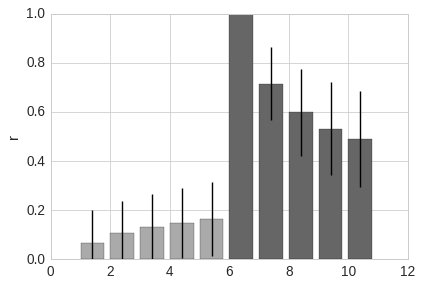

In [242]:
sns.set_style("whitegrid")
#set_univar  = [0.19,0.25,0.28,1,0.75,0.66]
#set_multivar= [0.08,0.11,0.12,1,0.65,0.53]
plt.figure()
colors = ['#aaaaaa', '#aaaaaa', '#aaaaaa', '#aaaaaa', '#aaaaaa', '#666666', '#666666' , '#666666', '#666666' , '#666666']

plt.bar([1,2,3,4,5,6,7,8,9,10],set_univar,yerr=set_univar_std,color=colors,ecolor='black')
plt.ylim([0,1])
plt.ylabel('r')

plt.savefig('samples/cor_bar_univar.png', dpi = 300, bbox_inches='tight')



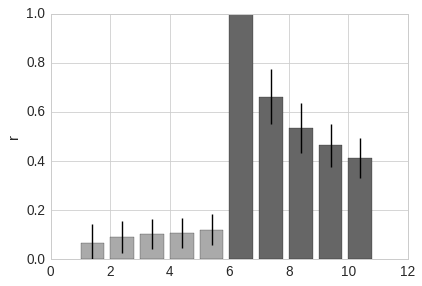

In [243]:
sns.set_style("whitegrid")
#set_univar  = [0.19,0.25,0.28,1,0.75,0.66]
#set_multivar= [0.08,0.11,0.12,1,0.65,0.53]
plt.figure()
colors = ['#aaaaaa', '#aaaaaa', '#aaaaaa', '#aaaaaa', '#aaaaaa', '#666666', '#666666' , '#666666', '#666666' , '#666666']

plt.bar([1,2,3,4,5,6,7,8,9,10],set_multivar,yerr=set_multivar_std,color=colors,ecolor='black')
plt.ylim([0,1])
plt.ylabel('r')

plt.savefig('samples/cor_bar_multivar.png', dpi = 300, bbox_inches='tight')

